In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os


In [6]:
data = pd.read_csv("C:/Users/admin/Desktop/Linear_Regression/data/Advertising_data.csv")
data.head(10)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290
5,8.7,48.9,75.0,720
6,57.5,32.8,23.5,1180
7,120.2,19.6,11.6,1320
8,8.6,2.1,1.0,480
9,199.8,2.6,21.2,1060


# Simple Linear Regression



here we will estimate the sales with respect to the advertisement on television

In [25]:
#Initializing the variables
X=data['TV'].values.reshape(-1,1)
y=data['sales'].values.reshape(-1,1)

print(X.shape)
print (y.shape)

(200, 1)
(200, 1)


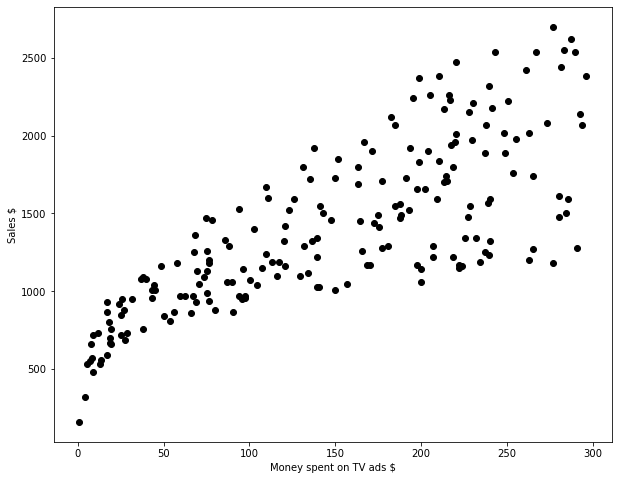

In [9]:
#ploting the graph
plt.figure(figsize=(10,8))
plt.scatter(X,y,c='black')
plt.xlabel("Money spent on TV ads $")
plt.ylabel("Sales $")
plt.show()

In [12]:
#means of x and y
mean_x=np.mean(X)
mean_y=np.mean(y)

#total no. of values

n=len(X)

#using the formula to calculate m and c

number = 0
denominator=0

for i in range(n):
    number += (X[i] - mean_x)*(y[i] - mean_y)
    denominator +=(X[i] - mean_x)**2
m=number/denominator
c=mean_y - (m * mean_x)

print(m , c)



[4.75366404] [703.25935491]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)



LinearRegression()

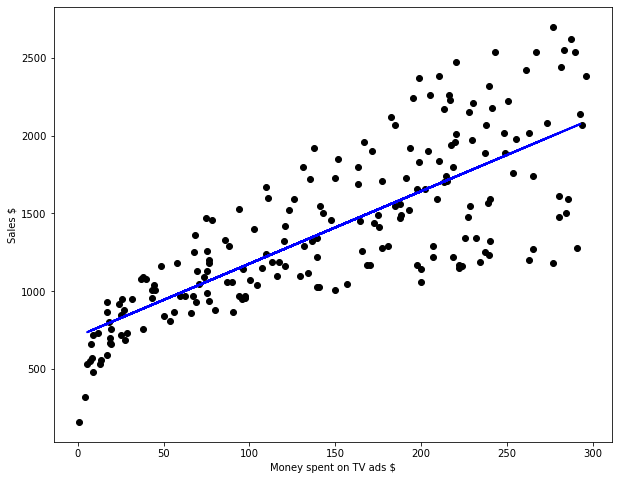

In [37]:
#predicting the test set result
y_pred=reg.predict(X_test)
plt.figure(figsize=(10,8))
plt.scatter(X,y,c='black')
plt.plot(X_test,y_pred,c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads $")
plt.ylabel("Sales $")
plt.show()


In [38]:
#we can also calculate the m and c like
reg.coef_
reg.intercept_

array([711.96384306])

In [39]:
#R**2 method to check goodness of fit
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.6766954295627077

In [40]:
output=reg.predict([[230.1]])
output

array([[1782.61301562]])

# Multiple Linear Regression

In [41]:
#initializing the variables
X=data.drop(['sales'],axis=1)
y=data['sales'].values.reshape(-1,1)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [44]:
from sklearn.linear_model import LinearRegression
multi_reg=LinearRegression()
multi_reg.fit(X_train,y_train)


LinearRegression()

In [45]:
y_pred=multi_reg.predict(X_test)

In [46]:
multi_reg.coef_



array([[ 4.47295175, 18.91950542,  0.27611143]])

In [48]:
multi_reg.intercept_

array([297.90673381])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.899438024100912

In [59]:
#Taking the input from the user
print("Enter the amount you will invest on:")
tv=float(input("TV: "))
radio=float(input("Radio: "))
newspaper=float(input("Newspaper: "))

#predicting the sales 

output=multi_reg.predict([[tv,radio,newspaper]])
print("You will get",output[0][0])

Enter the amount you will invest on:
TV: 100
Radio: 100
Newspaper: 100
You will get 2664.7635942568636


In [62]:
#saving the model
if not os.path.exists('models'):
    os.makedirs('models')
MODEL_PATH="models/multi_reg.sav"
pickle.dump(multi_reg,open(MODEL_PATH,'wb'))